## 1. Data Wrangling

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileName = 'GlobalLandTemperaturesByCountry.csv'
df = pd.read_csv(fileName)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [4]:
df['Date'] = pd.to_datetime(df['dt'])
df['Country'] = df['Country'].str.upper()
df = df[['Date','Country','AverageTemperature']]

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                544811 non-null  datetime64[ns]
 1   Country             544811 non-null  object        
 2   AverageTemperature  544811 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.6+ MB


### Exploring the data

In [6]:
#Number of missing values per column
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count')

,count,%
Date,0,0.0
Country,0,0.0
AverageTemperature,0,0.0


In [7]:
#Check if we have duplicated entries
df[df.duplicated()==True]

,Date,Country,AverageTemperature


In [8]:
#Which are the valid countries today?
import requests
url = 'https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/'
html = requests.get(url).content
df_list = pd.read_html(html)
country_list = pd.DataFrame(df_list[0])
valid_country_list = np.sort(country_list['Country'].str.upper().values)
valid_country_list

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',
       'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA',
       'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH',
       'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN', 'BHUTAN',
       'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BRAZIL',
       'BRUNEI', 'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'CABO VERDE',
       'CAMBODIA', 'CAMEROON', 'CANADA', 'CENTRAL AFRICAN REPUBLIC',
       'CHAD', 'CHILE', 'CHINA', 'COLOMBIA', 'COMOROS', 'CONGO',
       'COSTA RICA', 'CROATIA', 'CUBA', 'CYPRUS',
       'CZECH REPUBLIC (CZECHIA)', "CÔTE D'IVOIRE", 'DENMARK', 'DJIBOUTI',
       'DOMINICA', 'DOMINICAN REPUBLIC', 'DR CONGO', 'ECUADOR', 'EGYPT',
       'EL SALVADOR', 'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA',
       'ESWATINI', 'ETHIOPIA', 'FIJI', 'FINLAND', 'FRANCE', 'GABON',
       'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREECE', 'GRENADA',
       'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'H

In [9]:
#We expect only 195 countries in the world today, let's see how many there are in this dataset
countries_in_data = df['Country'].unique()
len(df['Country'].unique())
countries_in_data

array(['ÅLAND', 'AFGHANISTAN', 'AFRICA', 'ALBANIA', 'ALGERIA',
       'AMERICAN SAMOA', 'ANDORRA', 'ANGOLA', 'ANGUILLA',
       'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'ARUBA', 'ASIA',
       'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN',
       'BAKER ISLAND', 'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM',
       'BELIZE', 'BENIN', 'BHUTAN', 'BOLIVIA',
       'BONAIRE, SAINT EUSTATIUS AND SABA', 'BOSNIA AND HERZEGOVINA',
       'BOTSWANA', 'BRAZIL', 'BRITISH VIRGIN ISLANDS', 'BULGARIA',
       'BURKINA FASO', 'BURMA', 'BURUNDI', "CÔTE D'IVOIRE", 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CAPE VERDE', 'CAYMAN ISLANDS',
       'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE', 'CHINA',
       'CHRISTMAS ISLAND', 'COLOMBIA', 'COMOROS',
       'CONGO (DEMOCRATIC REPUBLIC OF THE)', 'CONGO', 'COSTA RICA',
       'CROATIA', 'CUBA', 'CURAÇAO', 'CYPRUS', 'CZECH REPUBLIC',
       'DENMARK (EUROPE)', 'DENMARK', 'DJIBOUTI', 'DOMINICA',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT'

In [10]:
import numpy as np
wrong_countries = np.setdiff1d(countries_in_data,valid_country_list)
wrong_countries

array(['AFRICA', 'AMERICAN SAMOA', 'ANGUILLA', 'ARUBA', 'ASIA',
       'BAKER ISLAND', 'BONAIRE, SAINT EUSTATIUS AND SABA',
       'BRITISH VIRGIN ISLANDS', 'BURMA', 'CAPE VERDE', 'CAYMAN ISLANDS',
       'CHRISTMAS ISLAND', 'CONGO (DEMOCRATIC REPUBLIC OF THE)',
       'CURAÇAO', 'CZECH REPUBLIC', 'DENMARK (EUROPE)', 'EUROPE',
       'FALKLAND ISLANDS (ISLAS MALVINAS)', 'FAROE ISLANDS',
       'FEDERATED STATES OF MICRONESIA', 'FRANCE (EUROPE)',
       'FRENCH GUIANA', 'FRENCH POLYNESIA',
       'FRENCH SOUTHERN AND ANTARCTIC LANDS', 'GAZA STRIP', 'GREENLAND',
       'GUADELOUPE', 'GUAM', 'GUERNSEY', 'GUINEA BISSAU',
       'HEARD ISLAND AND MCDONALD ISLANDS', 'HONG KONG', 'ISLE OF MAN',
       'JERSEY', 'KINGMAN REEF', 'MACAU', 'MACEDONIA', 'MARTINIQUE',
       'MAYOTTE', 'MONTSERRAT', 'NETHERLANDS (EUROPE)', 'NEW CALEDONIA',
       'NIUE', 'NORTH AMERICA', 'NORTHERN MARIANA ISLANDS', 'OCEANIA',
       'PALESTINA', 'PALMYRA ATOLL', 'PUERTO RICO', 'REUNION',
       'SAINT BARTHÉLEMY', 

In [11]:
df.replace('CAPE VERDE', 'CABO VERDE', inplace=True)
df.replace('CONGO (DEMOCRATIC REPUBLIC OF THE)', 'DR CONGO', inplace=True)
df.replace('CZECH REPUBLIC', 'CZECH REPUBLIC (CZECHIA)', inplace=True)
df.replace('DENMARK (EUROPE)', 'DENMARK', inplace=True)
df.replace('FEDERATED STATES OF MICRONESIA', 'MICRONESIA', inplace=True)
df.replace('FRANCE (EUROPE)', 'FRANCE', inplace=True)
df.replace('GUINEA BISSAU', 'GUINEA-BISSAU', inplace=True)
df.replace('MACEDONIA', 'NORTH MACEDONIA', inplace=True)
df.replace('NETHERLANDS (EUROPE)', 'NETHERLANDS', inplace=True)
df.replace('SAINT KITTS AND NEVIS', 'SAINT KITTS & NEVIS', inplace=True)
df.replace('SAINT VINCENT AND THE GRENADINES', 'ST. VINCENT & GRENADINES', inplace=True)
df.replace('SAO TOME AND PRINCIPE', 'SAO TOME & PRINCIPE', inplace=True)
df.replace('TIMOR LESTE', 'TIMOR-LESTE', inplace=True)
df.replace('UNITED KINGDOM (EUROPE)', 'UNITED KINGDOM', inplace=True)
#df.replace('', '', inplace=True)
#df.replace('', '', inplace=True)
#df.replace('', '', inplace=True)

In [12]:
# Filter all rows for which the country is valid
df = df[~df['Country'].isin(wrong_countries)]
df.head()

,Date,Country,AverageTemperature
3239,1838-04-01,AFGHANISTAN,13.008
3241,1838-06-01,AFGHANISTAN,23.950
3242,1838-07-01,AFGHANISTAN,26.877
3243,1838-08-01,AFGHANISTAN,24.938
3244,1838-09-01,AFGHANISTAN,18.981


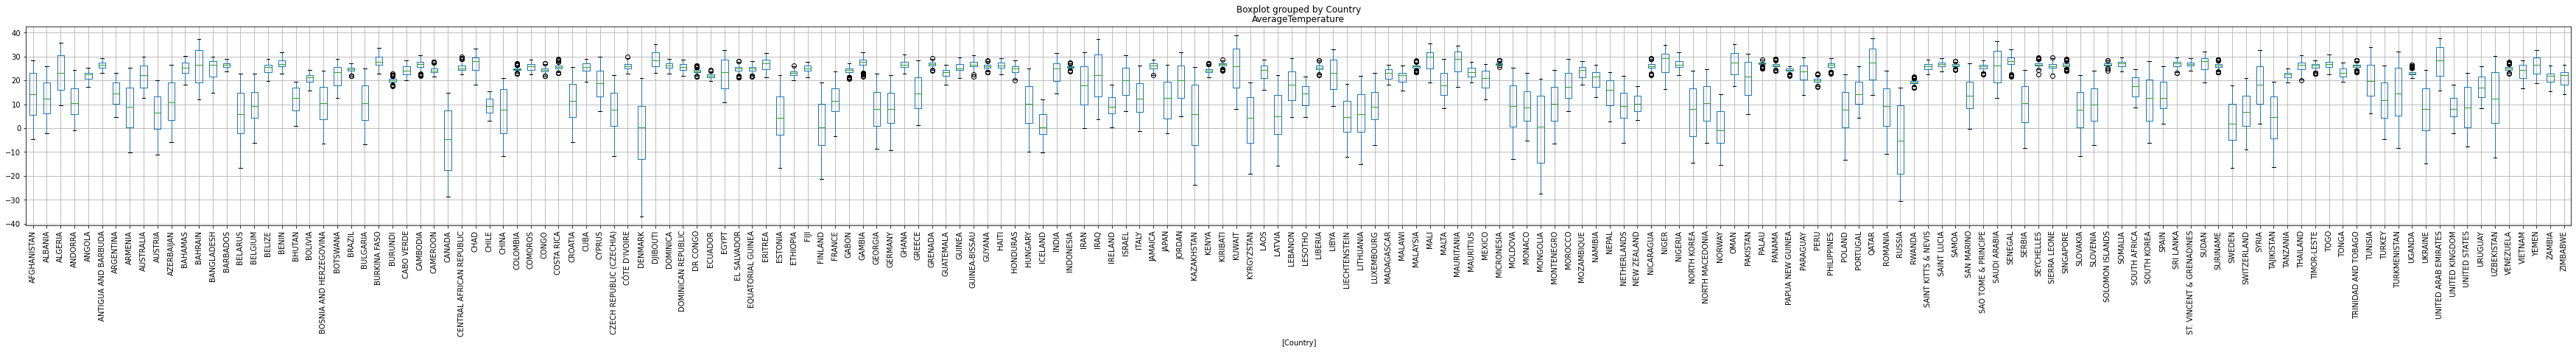

In [13]:
boxplot = df[['Country','AverageTemperature']].boxplot(by='Country',figsize=(60,5), rot=90)
plt.savefig('AverageTempByCountry.jpeg')
#All units seems to be in Celsius

In [14]:
#Select the country for which you want to do the analysis
import ipywidgets as widgets
country = widgets.Dropdown(
    options=valid_country_list,
    value='UNITED STATES',
    description='Country:',
    disabled=False,
)
def plot_country(country):
    temp_df = df[df['Country']==country]
    temp_df = temp_df.set_index('Date')
    temp_df = temp_df.resample('M').mean()
    temp_df.plot(figsize=(30,5))
    return temp_df
display(country)

Dropdown(description='Country:', index=186, options=('AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',…

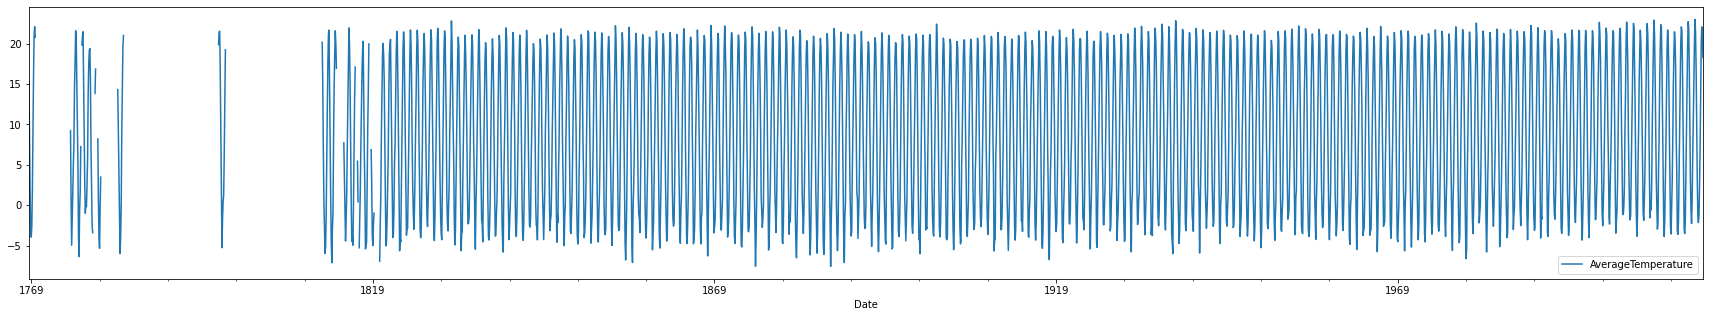

In [15]:
monthly_temp_by_country_df = plot_country(country.value)

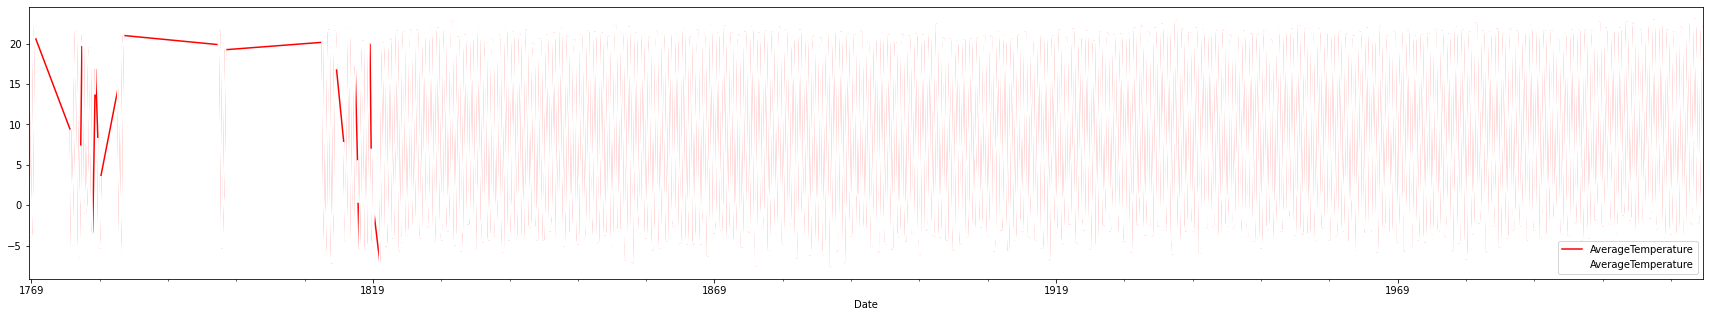

In [16]:
missing = monthly_temp_by_country_df.isna()
temp_interp = monthly_temp_by_country_df.interpolate('linear')
ax = temp_interp.plot(c='r')
monthly_temp_by_country_df.plot(c='white', ax=ax, lw=2, figsize=(30,5))
plt.savefig(country.value+'_adjustedTemp.jpeg')

In [17]:
#There is no point on filling the series with the missing values, so, I will truncate the series after no empty values
import datetime
last_missing_date = missing.index[missing['AverageTemperature']].max()
first_series_date = last_missing_date + datetime.timedelta(days=1)
monthly_temp_by_country_df = monthly_temp_by_country_df[first_series_date:'2021']

In [18]:
monthly_temp_by_country_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2325 entries, 1820-01-31 to 2013-09-30
Freq: M
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  2325 non-null   float64
dtypes: float64(1)
memory usage: 36.3 KB


<AxesSubplot:xlabel='Date'>

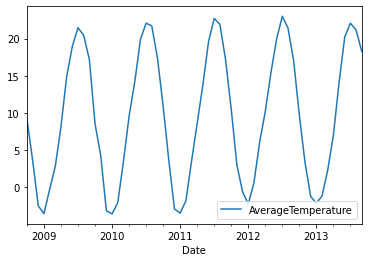

In [19]:
#Plotting the last 5 years
monthly_temp_by_country_df[-60:].plot()

## 2. Exploratory Data Analysis

In [20]:
#Validate that the data is stationary
from statsmodels.tsa.stattools import adfuller

X = monthly_temp_by_country_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.377479
p-value: 0.000325
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Since the p-value is less than 0.05, we reject the NULL hypothesis (the time series has a unit root, meaning it is non-stationary) and we can say that "he data does not have a unit root and is stationary"

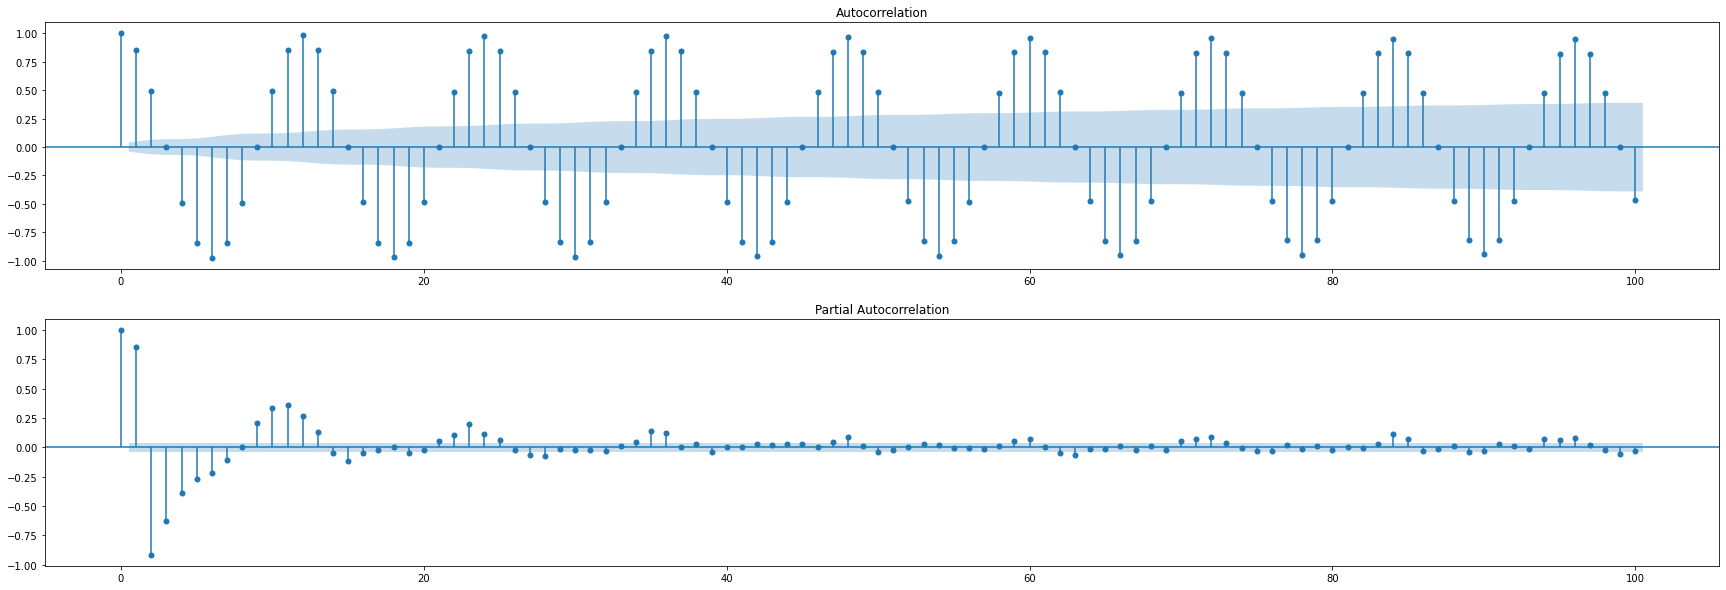

In [21]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute the acf array of monthly_temp_by_country_df
#acf_array = acf(monthly_temp_by_country_df)
#print(acf_array)

# Plot the acf function
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(30, 10))
plot_acf(monthly_temp_by_country_df,lags=100,alpha=0.05,ax=ax1)
plot_pacf(monthly_temp_by_country_df,lags=100,alpha=0.05,ax=ax2)
plt.show()

As we can see, the strongest correlation is on lag 6 and lag 12, which will correspond to Jul and December. Since both the ACF and the PACF tails off, we have an ARMA model

Now, let's obtain the seasonality and trend to find out if we have an additivie or multiplicative change over time.

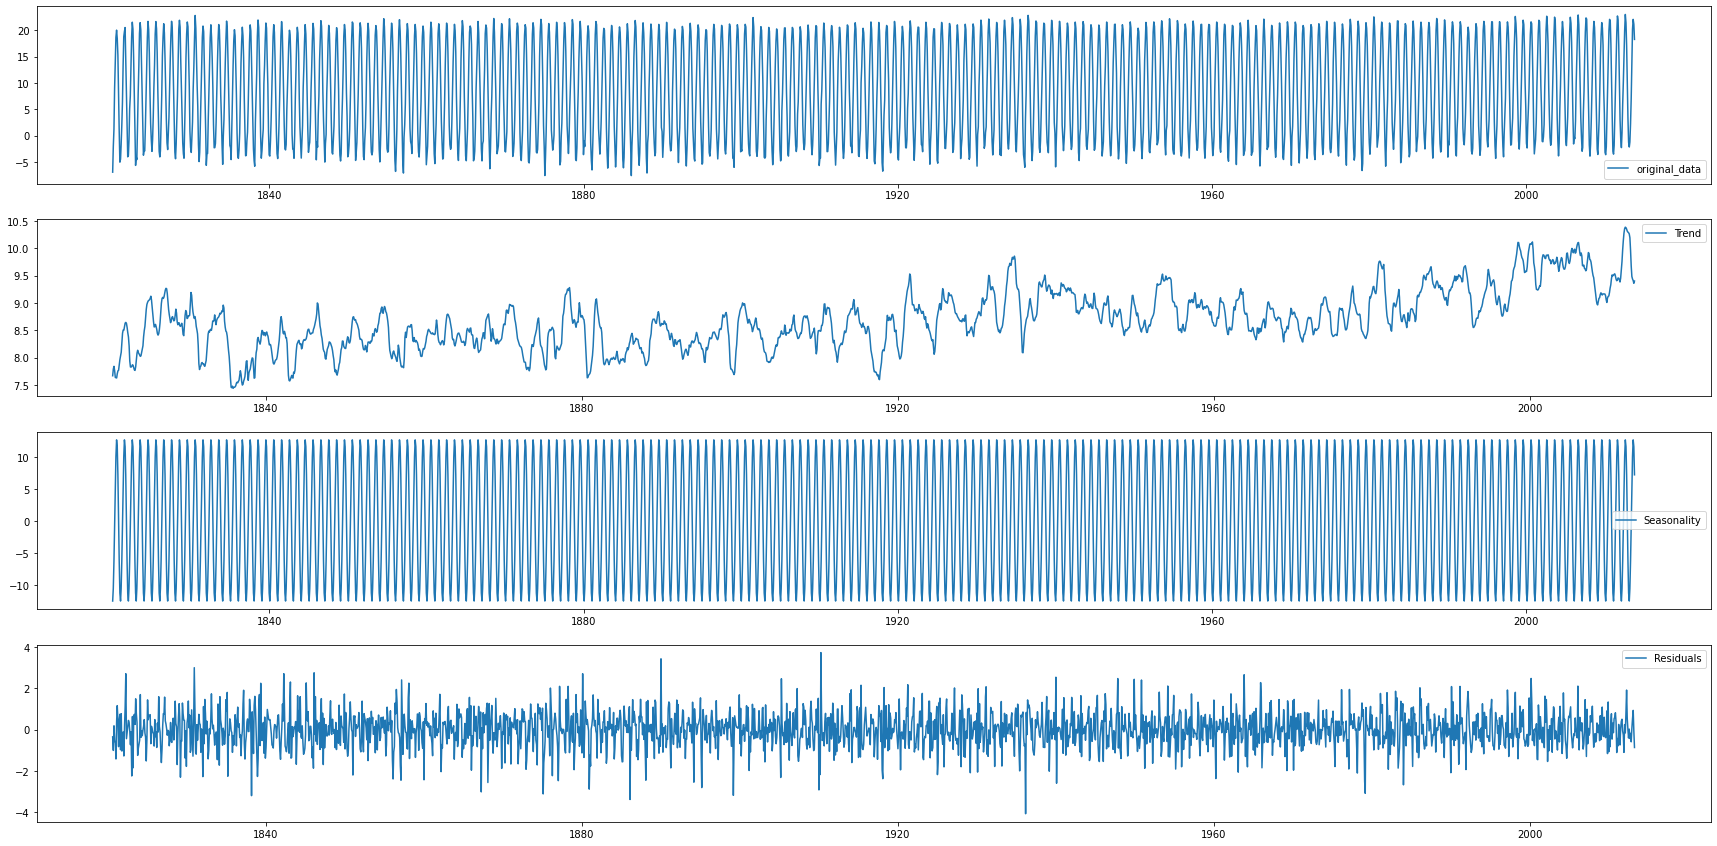

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_temp_by_country_df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#I am plotting the original data, the trend, the seasonality and the residuals
plt.figure(figsize=(30,15))

plt.subplot(411)
plt.plot(monthly_temp_by_country_df, label="original_data")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")

plt.savefig('decomposition.jpeg')

Since the linear seasonality has the same amplitude and frequency over time, we can say this has an additive seasonality.

Let's see if we have anomalies in the data

In [23]:
def detect_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
df_with_no_outliers = monthly_temp_by_country_df.apply(detect_outliers)

outliers = pd.concat([monthly_temp_by_country_df,df_with_no_outliers]).drop_duplicates(keep=False)
outliers

,AverageTemperature
Date,


## 3. Pre-processing and Training Data

In [25]:
X = monthly_temp_by_country_df
y = monthly_temp_by_country_df['AverageTemperature']
years = 3

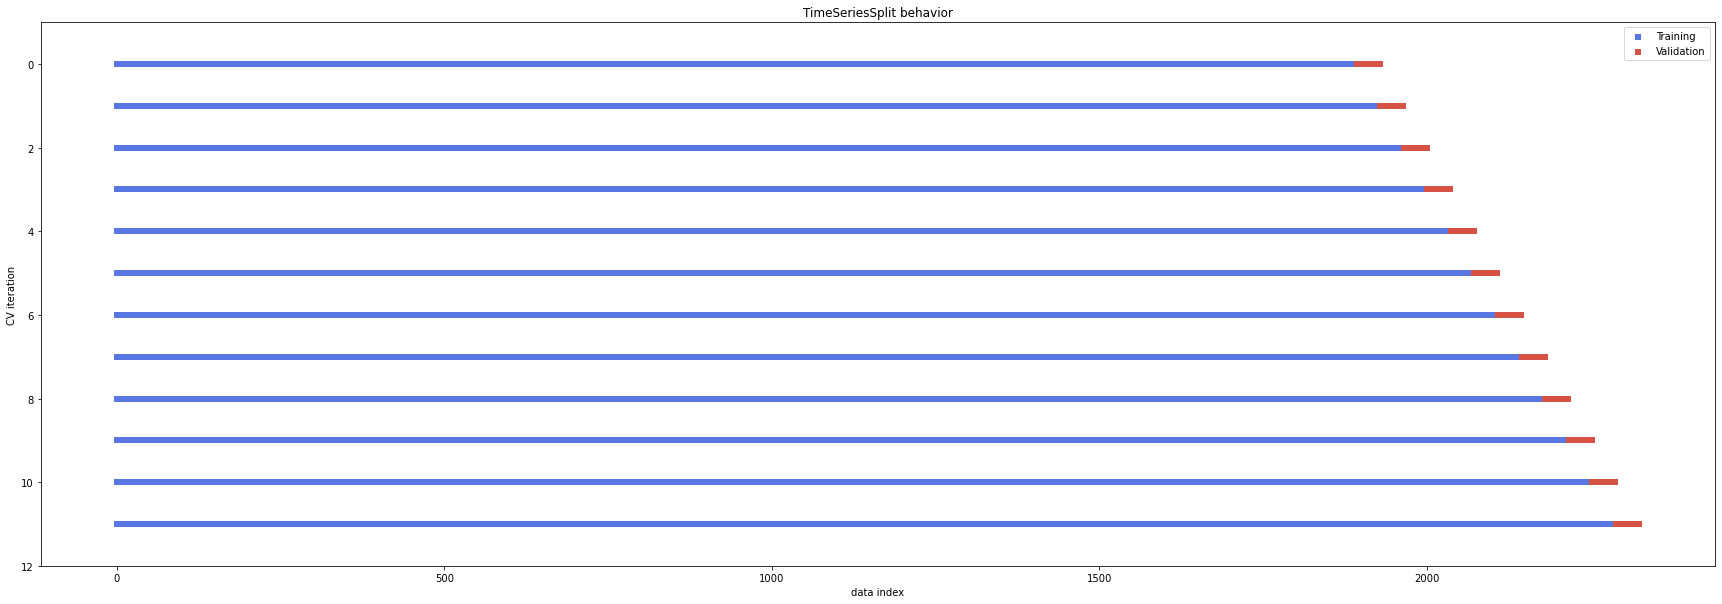

In [26]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=12,test_size=(years*12))

# Iterate through CV splits
fig, ax = plt.subplots(figsize=(30, 10))
for ii, (tr, ts) in enumerate(cv.split(X, y)):
    #Plot training and test indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)
    l2 = ax.scatter(ts, [ii] * len(ts), c=[plt.cm.coolwarm(.9)], marker='_', lw=6)
    # Plot the training data on each iteration, to see the behavior of the CV
    #ax.plot(tr, ii + y[tr])

ax.set(ylim=[12, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')
ax.legend([l1, l2], ['Training','Validation'])

#ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()

## 4. Modeling

In [28]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

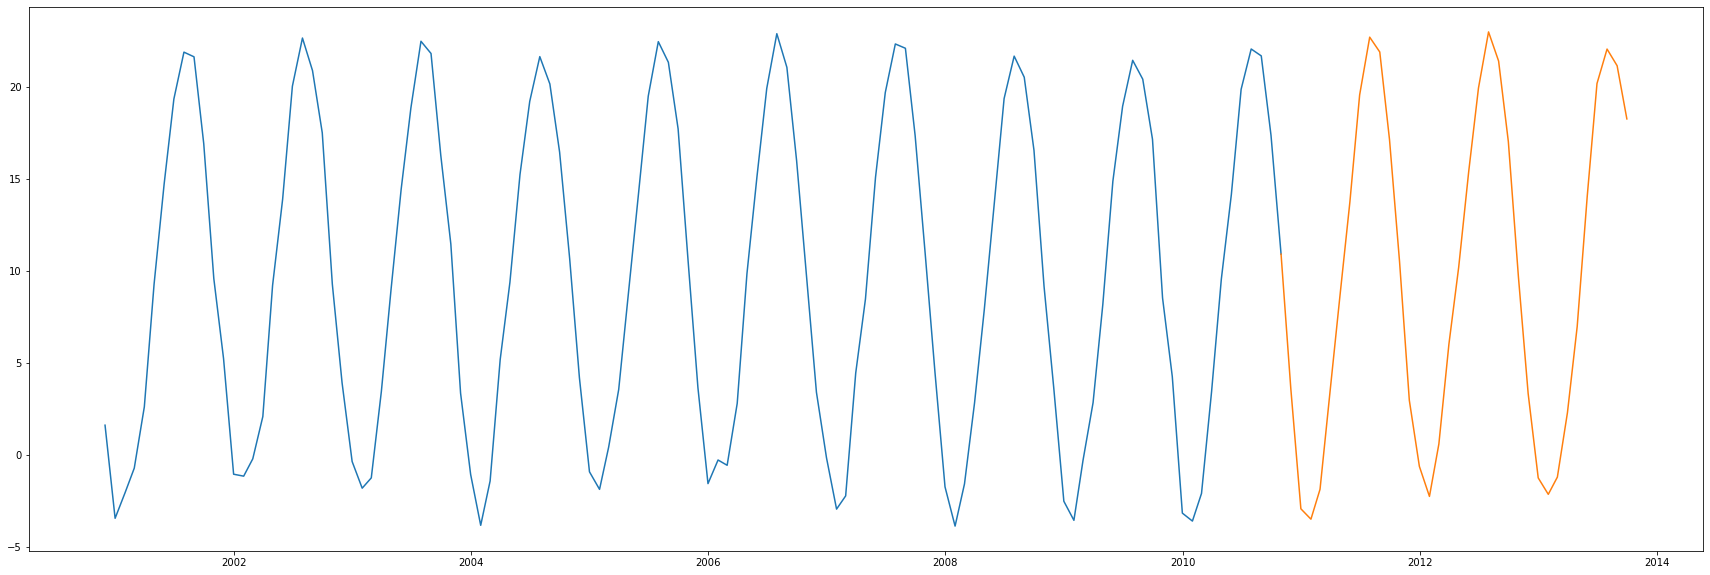

In [29]:
train = X[:-(12*years-1)]
test = X[(-12*years):]
plt.figure(figsize=(30,10))
plt.plot(train[-120:])
plt.plot(test)

In [30]:
arima_model = auto_arima(train, d=1, D=1, m=12,
                         start_p=0, start_q=0, 
                         max_p=5, max_d=5, max_q=5, 
                         start_P=0, start_Q=0, 
                         max_P=5, max_D=5, max_Q=5, 
                         seasonal=True, error_action='warn', trace=True, 
                         supress_warnings=True, stepwise=True, random_state=20, n_fits = 50)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8909.860, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7735.580, Time=0.39 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8334.971, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7400.417, Time=0.76 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=7235.919, Time=2.04 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=7148.910, Time=3.01 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=7092.266, Time=6.91 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=35.87 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=19.90 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=7629.691, Time=4.49 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=6900.358, Time=8.58 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=6964.902, Time=4.42 sec
 ARIMA(2,1,0)(5,1,1)[12]             : AIC=inf, Time=38.41 sec
 ARIMA(2,1,0)(4,1,1)[12]            

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2290
Model:             SARIMAX(5, 1, 0)x(5, 1, 0, 12)   Log Likelihood               -3333.746
Date:                            Mon, 09 Aug 2021   AIC                           6689.493
Time:                                    19:03:19   BIC                           6752.530
Sample:                                         0   HQIC                          6712.487
                                           - 2290                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7150      0.019    -38.083      0.000      -0.752      -0.678
ar.L2         -0.5284      0.023    -22.524      0.000      -0.574      -0.482
ar.L3         -0.3923      0.027    -14.659      0.000      -0.445      -0.340
ar.L4         -0.2712      0.028     -9.798      0.000      -0.325      -0.217
ar.L5         -0.1251      0.025     -5.035      0.000      -0.174      -0.076
ar.S.L12      -0.8405      0.018    -47.663      0.000      -0.875      -0.806
ar.S.L24      -0.7177      0.023    -31.676      0.000      -0.762      -0.673
ar.S.L36      -0.5191      0.025    -20.925      0.000      -0.568      -0.470
ar.S.L48      -0.3330      0.023    -14.513      0.000      -0.378      -0.288
ar.S.L60      -0.1695      0.018     -9.222      0.000      -0.206      -0.133
sigma2         1.0880      0.027     39.982      0.000       1.035       1.141
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                82.77
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Since the Prob(Q) is not less than 0.05 and the Prob(JB) is also less than 0.05, we reject the NULL hypothesis and conclude that the data is correlated and is normally distributed.

In [31]:
pred = pd.DataFrame(arima_model.predict(n_periods=(years*12)),index=test.index)
pred.columns = ['PredictedTemperature']
pred

,PredictedTemperature
Date,
2010-10-31,4.388829
2010-11-30,-1.117315
2010-12-31,-2.198138
2011-01-31,-0.561962
2011-02-28,3.918628
2011-03-31,9.354690
2011-04-30,15.046741
2011-05-31,20.126266
2011-06-30,22.730256


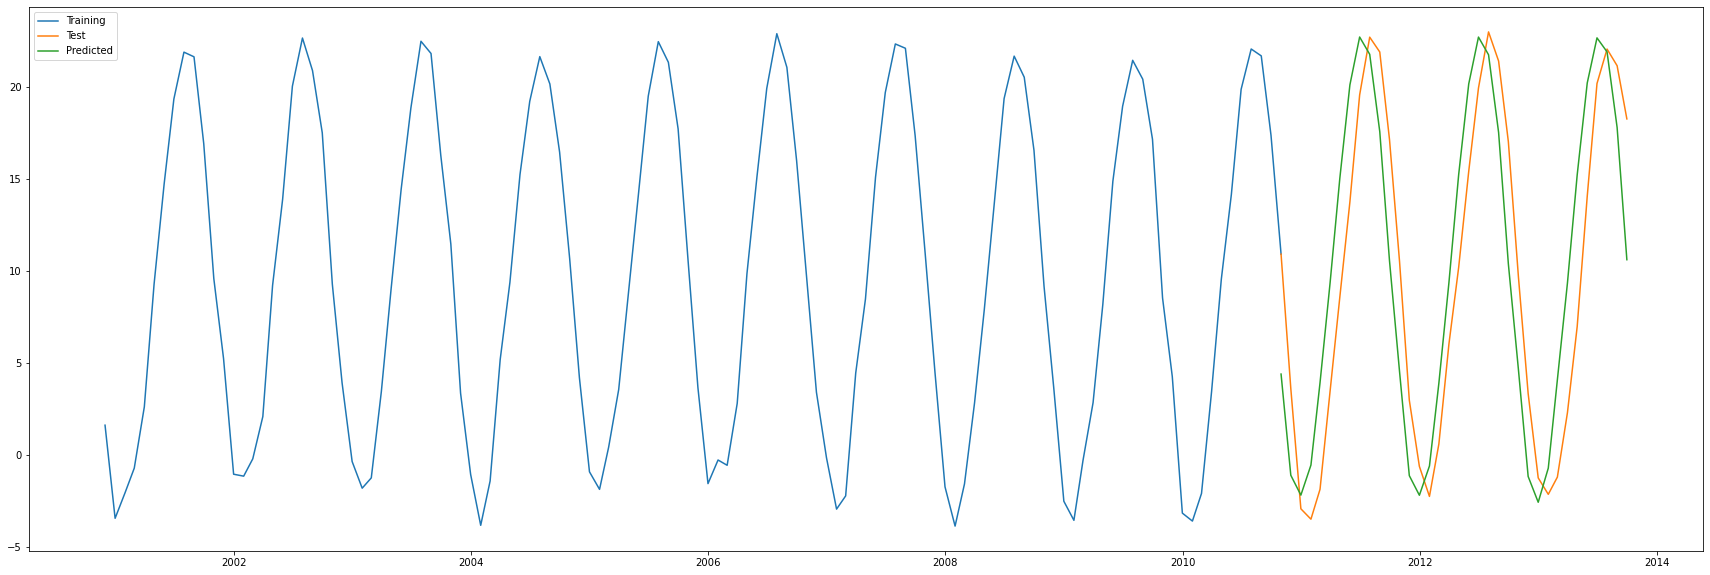

In [32]:
plt.figure(figsize=(30,10))
plt.plot(train[(-10*12):],label="Training")
plt.plot(test,label='Test')
plt.plot(pred,label='Predicted')
plt.legend(loc='upper left')
plt.show()

In [33]:
#How accurate is the model?
# Fit model
model = SARIMAX(train, order=(5, 1, 0))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print("the mean error of degrees per month is: ")
print(mae)

the mean error of degrees per month is: 
1.3435812933029445


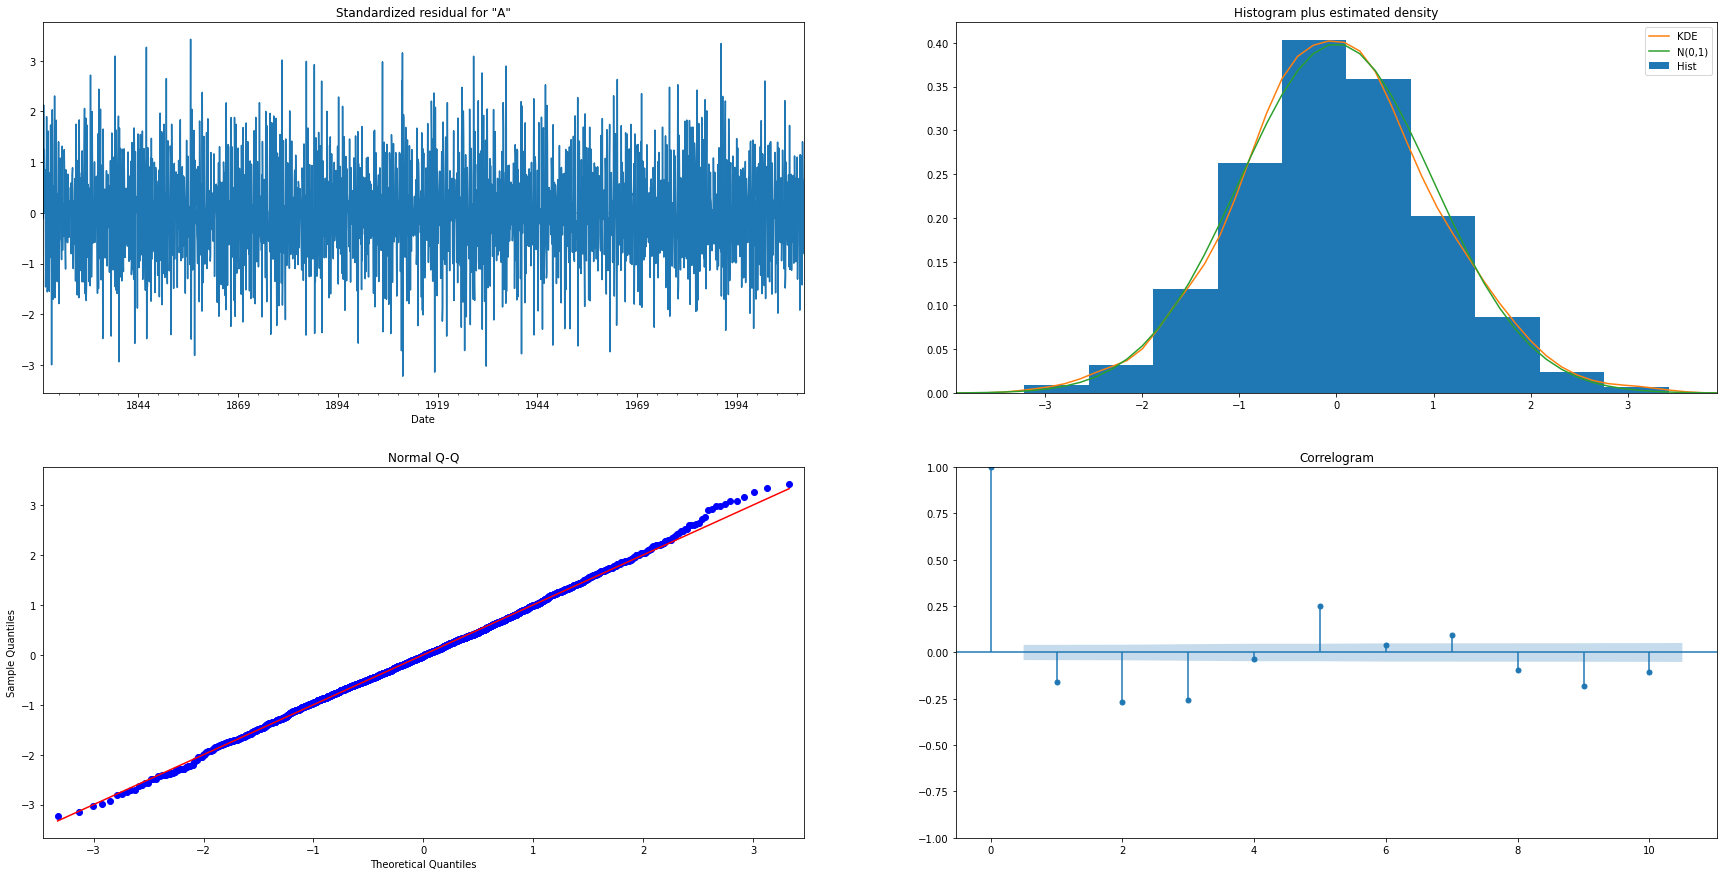

In [34]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(30,15))
plt.show()

In [91]:
#Predicting the future of the data
from dateutil.relativedelta import relativedelta
future_index = [(max(X.index) + relativedelta(months=1)) + relativedelta(months=i) for i in range(years*12)] 

pred = pd.DataFrame(arima_model.predict(n_periods=(years*12)),index=future_index)
pred.columns = ['PredictedTemperature']

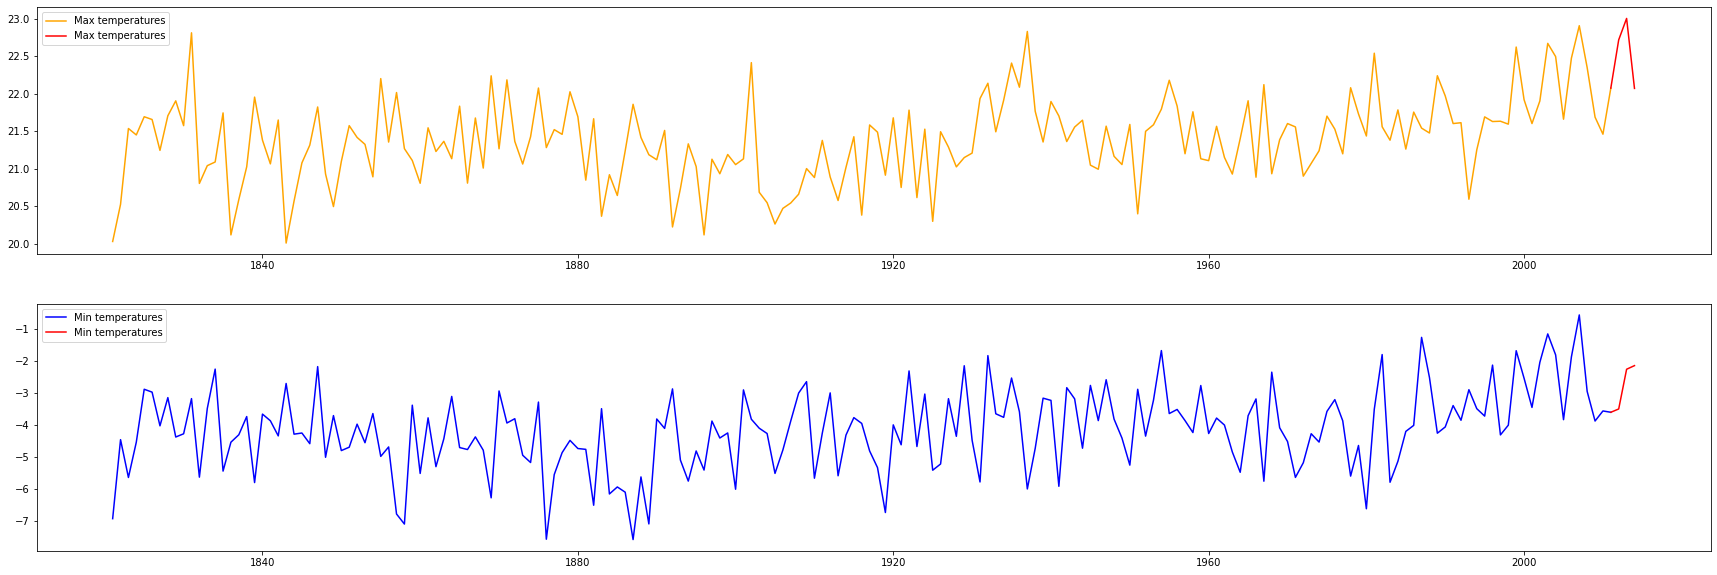

In [92]:
max_past = pd.concat([X,pred]).resample('A').max()
min_past = pd.concat([X,pred]).resample('A').min()

fig, (ax11,ax12) = plt.subplots(2,1, figsize=(30, 10))
ax11.plot(max_temp[:-years], label="Max temperatures", color='orange')
ax11.plot(max_temp[-years-1:], label="Max temperatures", color='red')
ax11.legend(loc='upper left')

ax12.plot(min_temp[:-years], label='Min temperatures', color='blue')
ax12.plot(min_temp[-years-1:], label='Min temperatures', color='red')
ax12.legend(loc='upper left')

plt.show()